**[Opsim Databases](http://astro-lsst-01.astro.washington.edu:8080/)**

- [baseline2018](#baseline2018.db)
- [colossus_2667](#colossus_2667.db)
- [pontus_2573](#pontus_2573.db)
- [pontus_2579](#pontus_2579.db)
- [pontus_2489](#pontus_2489.db)
- [nexus_2097](#nexus_2097.db)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.plots as plots

# open database use OpsimDatabase
# opsdb = db.OpsimDatabase('baseline2018a.db')

# output
outDir = 'outdir'
resultsDb = db.ResultsDb(outDir=outDir)



In [2]:
import pickle

import [TDEsMetricTest](https://github.com/xiaolng/maf/blob/master/TDEsMetricTest.py)


In [3]:
from mycode.TDEsMetricTest import TDEsMetricTest
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set default size of plots


**Minimum requirement for detection TDEs**

- one detection before peak in any band,  set nObsPrePeak=1;
- detections in three different bands within 5 days of peak, set nFiltersNearPeak=3, and nearPeakT=5;
- detections at least two bands post peak within two weeks, set nFiltersPostPeak=2, and postPeakT=14.


In [4]:
# light curve file
asciifile = 'TDEfaintfast_z0.1.dat'

# query columns 
mjdCol = 'observationStartMJD'
m5Col = 'fiveSigmaDepth'
filterCol = 'filter'
detectSNR={'u': 5, 'g': 5, 'r': 5, 'i': 5, 'z': 5, 'y': 5}

# light curve parameters
epochStart = -22
peakEpoch = 0
nearPeakT = 10
postPeakT = 14 # two weeks
nPhaseCheck = 1

# condition parameters
nObsTotal = {'u': 0, 'g': 0, 'r': 0, 'i': 0, 'z': 0, 'y': 0}
nObsPrePeak = 1
nObsNearPeak = {'u': 0, 'g': 0, 'r': 0, 'i': 0, 'z': 0, 'y': 0}
nFiltersNearPeak = 3
nObsPostPeak = 0 
nFiltersPostPeak = 2


In [8]:
# plot light curve
def plotlc(dataSlice, time_key='time', mag_key='mag', filter_key='filter', err_key = None,
          peakEpoch=None, nearPeakT=None, postPeakT=None):
    # Input: dataSlice, pandas DataFrame or numpy ndarray
    
    colors = {'u':'k', 'g':'b', 'r':'r', 'i':'m', 'z':'orange', 'y':'c'}
    
    plt.figure(figsize=(10, 6))
    for f in np.unique(dataSlice[filter_key]):
        fmatch = dataSlice[filter_key]==f
        time = dataSlice[time_key][fmatch]
        mag = dataSlice[mag_key][fmatch]
        
        # seperate pre/near/post peak
        if peakEpoch!=None:
            plt.axvline(x=peakEpoch, linestyle='-', linewidth=1)
            plt.axvline(x=peakEpoch-nearPeakT/2, linestyle='--', linewidth=1)
            plt.axvline(x=peakEpoch+nearPeakT/2, linestyle='--', linewidth=1)
            plt.axvline(x=peakEpoch+nearPeakT/2+postPeakT, linestyle='--', linewidth=1)
        
        if err_key!=None:
            mag_err = dataSlice[err_key][fmatch]
            plt.errorbar(time, mag, yerr=mag_err, color=colors[f], fmt='.', label=f)
        else:
            plt.scatter(time, mag, color=colors[f], marker='*', label=f)

    plt.legend()
    plt.xlabel('days')
    plt.ylabel('mag')
    plt.ylim(plt.ylim()[::-1])
    

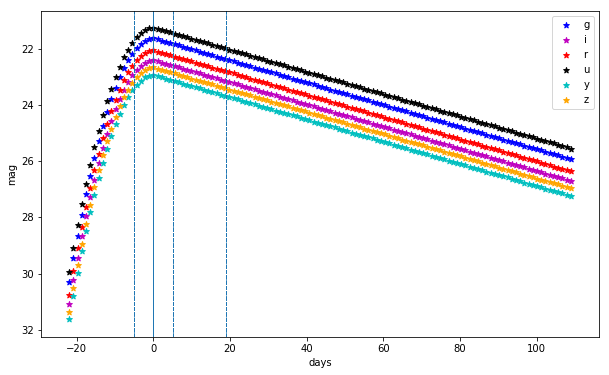

In [6]:
asciifile = 'TDEfaintfast_z0.1.dat'

lcv_template = np.genfromtxt(asciifile, dtype=[('ph', 'f8'), ('mag', 'f8'), ('flt', 'S1')])

df = pd.DataFrame()
df['ph'] = lcv_template['ph']
df['mag'] = lcv_template['mag']
df['flt'] = lcv_template['flt'].astype(str)

plotlc(df, time_key='ph', mag_key='mag', filter_key='flt', peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT)



## baseline2018.db

Project-official baseline (official opsim v4 baseline, 6/2018). No dome crawl.	

In [5]:
opsdb_baseline = db.OpsimDatabase('baseline2018a.db')

Finish initializing metric
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint night<700 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 431650 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<700" constraint now.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.0103562  dipole: lon: 133.196, lat: -61.0935, amp: 0.0212816
Plotting complete.


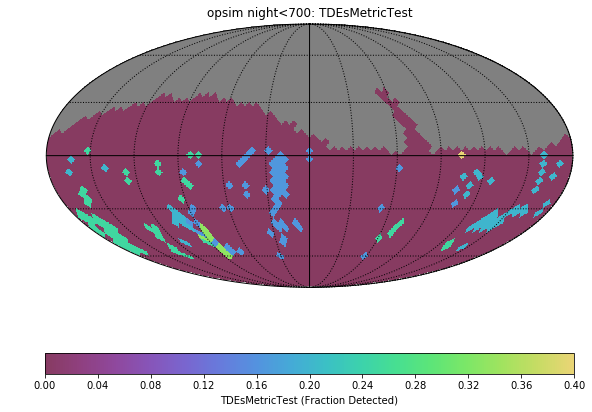

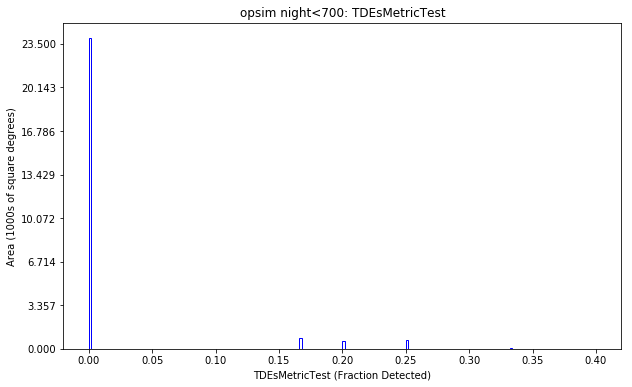

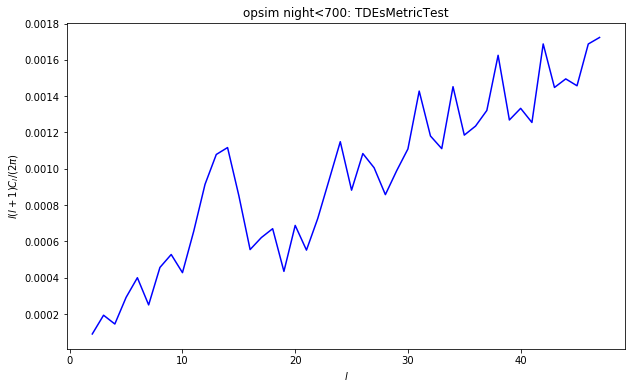

In [15]:
## get skymap
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=False)

slicer = slicers.HealpixSlicer(nside=16) 
sqlconstraint = 'night<700'

transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_baseline, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

In [16]:
baseline2018_skymap = transmetricSky.metricValues

# write to file
pkfile = open('./opsdb/TDEsDb.pickle', 'wb')
pickle.dump(baseline2018_skymap, pkfile)
pkfile.close()

# load from file
# pkfile = open('./opsdb/TDEsDb.pickle', 'rb')
# var = pickle.load(pkfile)  # variables come out in order
# pkfile.close()


In [17]:
# view all metric values 
np.unique(baseline2018_skymap)

masked_array(data = [0.0 0.16666666666666666 0.2 0.25 0.3333333333333333 0.4 --],
             mask = [False False False False False False  True],
       fill_value = -1.6375e+30)

In [24]:
# get the ipix 
np.where(baseline2018_skymap==0.4) 

(array([1549]),)

In [25]:
hp.pix2ang(ipix=1549, nside=16, lonlat=True)

(255.9375, 0.0)

In [26]:
# create dataframe and save to csv file
df = pd.DataFrame(baseline2018_skymap)
df['ipix'] = df.index 
df['ra'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[0]
df['dec'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[1]
df['metricValues'] = df[0]
del df[0]
df.to_csv('./opsdb/baseline2018_skymap.csv', index=False, na_rep='NaN')

# load from csv
# df = pd.read_csv('./opsdb/baseline2018_skymap.csv') 

df.head()

,ipix,ra,dec,metricValues
0,0,45.0,87.075820,NaN
1,1,135.0,87.075820,NaN
2,2,225.0,87.075820,NaN
3,3,315.0,87.075820,NaN
4,4,22.5,84.149733,NaN


In [27]:
# plot skymap
def plot_mwd(RA, Dec, c, org=0, title='Mollweide projection', projection='mollweide'):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection, axisbg ='LightCyan')
    ax.scatter(np.radians(x), np.radians(Dec), c=c, marker='D')  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)

    

/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/projections/geo.py:493: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


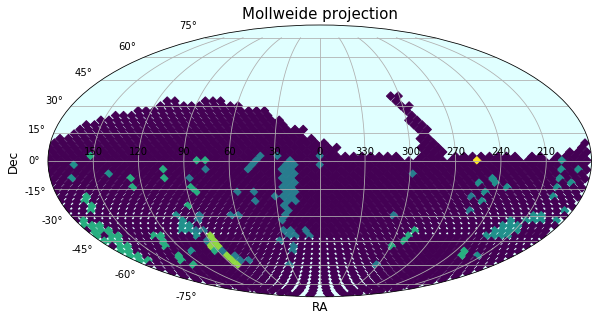

In [28]:
plot_mwd(df['ra'], df['dec'], df['metricValues'])

In [29]:
## get light curve
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=True)
# ra,dec of ipix 
ra = np.array([255.9375])
dec = np.array([0.0])
slicer = slicers.UserPointsSlicer(ra, dec)

sqlconstraint = 'night<700'
transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_baseline, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

Finish initializing metric
Querying database SummaryAllProps with constraint night<700 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 431650 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<700" constraint now.
Plotting complete.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/plots/plotHandler.py:517: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


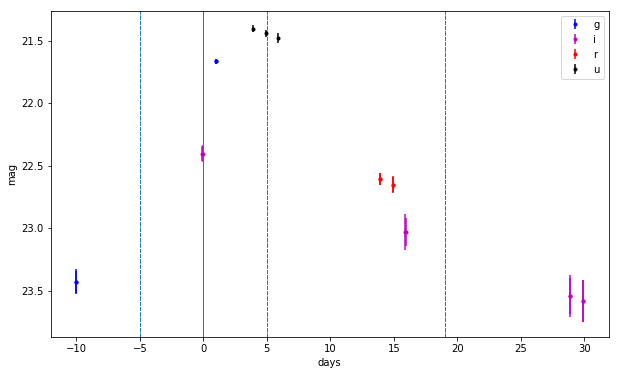

In [35]:
# save file and plot light curve

output_dict_list = transmetricSky.metricValues.data[0]
df = pd.DataFrame(output_dict_list[0])

df.to_csv('./opsdb/baseline2018_lc.csv', index=False)

# load from csv
# df = pd.read_csv('./opsdb/baseline2018_lc.csv')

# plotlc(df[ (df['lcAboveThresh'])], time_key='expMJD', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd')

plotlc(df[ (df['lcAboveThresh']) & (df['lcNumber']==0)], time_key='lcEpoch', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd', peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT)



In [37]:
df3 = df[(df['lcNumber']==3)&(df['nearPeakCheck'])]
df3

,detected,expMJD,filters,lcAboveThresh,lcEpoch,lcMags,lcMagsStd,lcNumber,lcSNR,m5,nearPeakCheck,postPeakCheck,prePeakCheck,tshift
115,True,60436.299525,r,True,-3.812014,22.329820,0.038450,3.0,27.740342,24.190175,True,False,False,0.0
116,True,60436.315625,r,True,-3.795914,22.327625,0.033274,3.0,32.133071,24.347580,True,False,False,0.0
117,True,60442.244745,u,True,2.133206,21.327571,0.046809,3.0,22.698864,22.970156,True,False,False,0.0
118,True,60443.275718,i,True,3.164178,22.525061,0.082657,3.0,12.641720,23.532151,True,False,False,0.0
119,True,60443.297326,i,True,3.185787,22.525847,0.101201,3.0,10.236299,23.303779,True,False,False,0.0
